# **This project was made with python 2.7.12**

In this notebook, datasets from https://www.foreignlaborcert.doleta.gov/performancedata.cfm containing information on H-1B visa applications were cleaned and merged together for light analysis. The dataframes used are the 2014, 2015 and 2016 fiscal years.

The excel files were first converted to csv files (as they were clunky in excel) and then converted to pandas dataframes. Inconsistent fields are then removed from each dataframe and then fields are renamed to be consistent with the 2016 dataset.

The dataframes are then merged together.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from datetime import datetime
import re
import math

pd.set_option('max_columns', 30)

In [2]:
d14 = pd.read_csv("H-1B_FY14_Q4.csv")
d15 = pd.read_csv("H-1B_Disclosure_Data_FY15_Q4.csv")
d16 = pd.read_csv("H-1B_Disclosure_Data_FY16.csv")

/Users/williamcheng/anaconda/envs/python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Below are the lists of unnecessary fields to be removed from each dataframe. 

In [3]:
# 2016
del16_list = ['EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_ADDRESS', 'EMPLOYER_POSTAL_CODE',
              'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'AGENT_ATTORNEY_NAME',
              'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
              'WAGE_RATE_OF_PAY_TO', 'H-1B_DEPENDENT', 'WORKSITE_COUNTY', 'WILLFUL_VIOLATOR', 'WORKSITE_POSTAL_CODE',
              'ORIGINAL_CERT_DATE']

# 2015
del15_list = ['EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
              'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT',
              'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'PW_WAGE_SOURCE_YEAR',
              'PW_WAGE_LEVEL', 'H-1B_DEPENDENT', 'PW_WAGE_SOURCE_OTHER', 'WILLFUL VIOLATOR', 'WORKSITE_COUNTY',
              'WORKSITE_POSTAL_CODE']

# 2014
del14_list = ['LCA_CASE_EMPLOYMENT_START_DATE', 'LCA_CASE_EMPLOYMENT_END_DATE', 'LCA_CASE_EMPLOYER_ADDRESS',
              'LCA_CASE_EMPLOYER_POSTAL_CODE', 'LCA_CASE_WAGE_RATE_TO', 'OTHER_WAGE_SOURCE_1', 'YR_SOURCE_PUB_1',
              'LCA_CASE_WORKLOC2_CITY', 'LCA_CASE_WORKLOC2_STATE', 'PW_2', 'PW_UNIT_2', 'PW_SOURCE_2',
              'OTHER_WAGE_SOURCE_2', 'YR_SOURCE_PUB_2']

Deleting the fields from each dataframe.

In [4]:
for column_name in del16_list:
    del d16[column_name]

for column_name in del15_list:
    del d15[column_name]

for column_name in del14_list:
    del d14[column_name]

Renaming field columns so that they are consistent with the 2016 dataset.

In [5]:
d15.rename(columns={'TOTAL WORKERS': 'TOTAL_WORKERS', 'WAGE_RATE_OF_PAY': 'WAGE_RATE_OF_PAY_FROM'}, inplace=True)
d14.rename(columns={'LCA_CASE_NUMBER': 'CASE_NUMBER', 'STATUS': 'CASE_STATUS', 'LCA_CASE_SUBMIT': 'CASE_SUBMITTED',
                    'LCA_CASE_EMPLOYER_NAME': 'EMPLOYER_NAME', 'LCA_CASE_EMPLOYER_CITY': 'EMPLOYER_CITY',
                    'LCA_CASE_EMPLOYER_STATE': 'EMPLOYER_STATE', 'LCA_CASE_SOC_CODE': 'SOC_CODE',
                    'LCA_CASE_SOC_NAME': 'SOC_NAME', 'LCA_CASE_JOB_TITLE': 'JOB_TITLE',
                    'LCA_CASE_WAGE_RATE_FROM': 'WAGE_RATE_OF_PAY_FROM', 'LCA_CASE_WAGE_RATE_UNIT': 'WAGE_UNIT_OF_PAY',
                    'FULL_TIME_POS': 'FULL_TIME_POSITION', 'LCA_CASE_WORKLOC1_CITY': 'WORKSITE_CITY',
                    'LCA_CASE_WORKLOC1_STATE': 'WORKSITE_STATE', 'PW_1': 'PREVAILING_WAGE',
                    'PW_UNIT_1': 'PW_UNIT_OF_PAY', 'PW_SOURCE_1': 'PW_WAGE_SOURCE',
                    'LCA_CASE_NAICS_CODE': 'NAIC_CODE'}, inplace=True)

Merging the dataframes together.

In [6]:
frames = [d14, d15, d16]
df = pd.concat(frames, ignore_index=True)
df.shape

(1786160, 21)

Converting the dates into datetime objects

In [7]:
df['DECISION_DATE'] = df['DECISION_DATE'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())
df['CASE_SUBMITTED'] = df['CASE_SUBMITTED'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())

Some inconsistent results found in the CASE_STATUS field (REJECTED and INVALIDATED).

In [8]:
df['CASE_STATUS'].value_counts()

CERTIFIED              1572068
CERTIFIED-WITHDRAWN     124513
WITHDRAWN                57435
DENIED                   32141
REJECTED                     2
INVALIDATED                  1
Name: CASE_STATUS, dtype: int64

There are potential spelling mistakes with city names (could use levenshtein distance to amend some of them though that make more errors).

In [9]:
df['EMPLOYER_CITY'].value_counts()

PLANO                  110301
NEW YORK                97630
CHICAGO                 57284
ROCKVILLE               45442
EDISON                  43317
PHILADELPHIA            35766
HOUSTON                 33588
EAST BRUNSWICK          33070
DURHAM                  32138
SUNNYVALE               28181
SAN FRANCISCO           26869
IRVING                  25900
SAN JOSE                25382
SANTA CLARA             23769
TROY                    21315
MOUNTAIN VIEW           20714
DALLAS                  20316
ISELIN                  18847
PISCATAWAY              18097
BOSTON                  17703
ATLANTA                 16169
REDMOND                 15426
FREMONT                 15174
SECAUCUS                14743
SEATTLE                 13951
TAMPA                   13190
PRINCETON               13114
COLLEGE STATION         12414
ALPHARETTA              11180
FARMINGTON HILLS        10607
                        ...  
PARSSIPPANY                 1
NILE                        1
PAHOKEE   

A single error in VISA_CLASSIFICATION (Select Visa Classification)

In [10]:
df['VISA_CLASS'].value_counts()

H-1B                          1748422
E-3 Australian                  32565
H-1B1 Singapore                  2998
H-1B1 Chile                      2174
Select Visa Classification          1
Name: VISA_CLASS, dtype: int64

Function which converts the wage information into yearly units. Attempts to process some of the differing inputs.

Some of the wage data come in the form of ranges ('7384 - 14234'). The function first checks for this form and then uses split to get the first and second number. The average is then found and used. If this doesn't work, then NaN is placed instead.

If the number is not a range, then all characters which are not numbers or a decimal place are stripped from the string. This process removes comma's from the values as they are not needed. There are cases where there are two decimal places in the data which complicates things.

If the value passes these checks, then it is converted depending on the unit type.

It is also apparent that the unit type can also be incorrect. A function could be made checking this by checking if the WAGE_RATE_OF_PAY unit is larger than the PREVAILING_WAGE unit. If this is not the case, there may be an error in the unit.

In [11]:
def unit_converter(unit, value):
    """
    :param:
    unit - the unit corresponding to the value
    value - 
    
    """
    if type(value) is str:
        # '-' check (could just use the bottom and upper and take the average)
        if ' - ' in value:
            split = value.split()
            
            # if there isn't 3 entrys in the list, then unknown case.
            if len(split) != 3:
                value = float('NaN')
            
            # Checks if '-' is still present in the splitted values. If there is, then unknown case.
            check = ['-' in x for x in split]
            if check[0] or check[2]:
                value = float('NaN')
            
            # if it passes all the above conditions, then take the average.
            else:
                try:
                    value = (float(split[0]) + float(split[2]))/2
                except:
                    # prints value if it doesn't work
                    print value
                    value= float('NaN')
        
        # Strips away non numeric characters (not perfect, misses out e.g 1605.0505.00)
        else:
            stripped_value = ''.join([c for c in value if c in '0123456789.'])
            try:
                value = float(stripped_value)
            except:
                value = float('NaN')
                
    # Converts the units if the above conditions are passed and not a NaN.
    if unit != 'Year' and value != float('NaN'):
        if unit == 'Month':
            value = value * 12
        if unit == 'Hour':
            value = value * 8760
        if unit == 'Week':
            value = value * 52
        if unit == 'Bi-Weekly':
            value = value * 26
            
    return value

Using unit_converter to convert prevailing wages and offered wages.

Cases where unit_converter doesn't work are printed below. 

In [12]:
df['YEARLY_PREVAILING_WAGE'] = np.vectorize(unit_converter)(df['PW_UNIT_OF_PAY'], df['PREVAILING_WAGE'])
df['YEARLY_WAGE_RATE_OF_PAY_FROM'] = np.vectorize(unit_converter)(df['WAGE_UNIT_OF_PAY'], df['WAGE_RATE_OF_PAY_FROM'])

68000.00 - N/A


Can see there are some cases where mistakes are still present. In the below case, it's probably WAGE_UNIT_OF_PAY thats wrong. Could maybe solve this by checking if the wage rate of pay is larger than the prevailing wage and check if this makes sense with the units of each (though this won't catch the below case). Could just make a threshold value for each unit where it flags values above the threshold. 

In [13]:
df.loc[df['YEARLY_WAGE_RATE_OF_PAY_FROM'].idxmax()]

CASE_NUMBER                           I-200-13319-914166
CASE_STATUS                                    CERTIFIED
CASE_SUBMITTED                                2013-11-15
DECISION_DATE                                 2013-11-26
EMPLOYER_CITY                                   SECAUCUS
EMPLOYER_NAME                     ERNST & YOUNG U.S. LLP
EMPLOYER_STATE                                        NJ
FULL_TIME_POSITION                                     Y
JOB_TITLE                                    TAX MANAGER
NAIC_CODE                                         541211
PREVAILING_WAGE                                    76149
PW_UNIT_OF_PAY                                      Year
PW_WAGE_SOURCE                                       OES
SOC_CODE                                         13-2011
SOC_NAME                        Accountants and Auditors
TOTAL_WORKERS                                          1
VISA_CLASS                                          H-1B
WAGE_RATE_OF_PAY_FROM          

Counting the number of NaNs left in the yearly offered and prevailing wage fields (some have been placed if they could not be resolved in unit_converter)

In [14]:
df['YEARLY_WAGE_RATE_OF_PAY_FROM'].apply(lambda x: math.isnan(x)).value_counts()

False    1786103
True          57
Name: YEARLY_WAGE_RATE_OF_PAY_FROM, dtype: int64

In [15]:
df['YEARLY_PREVAILING_WAGE'].apply(lambda x: math.isnan(x)).value_counts()

False    1786008
True         152
Name: YEARLY_PREVAILING_WAGE, dtype: int64

Spliiting the dataframe into fiscal years (could have just use the seperate dataframe at the top.)

In [16]:
timerange16 = pd.date_range(datetime(2015, 10, 1), datetime(2016, 9, 30)).date
timerange15 = pd.date_range(datetime(2014, 10, 1), datetime(2015, 9, 30)).date
timerange14 = pd.date_range(datetime(2013, 10, 1), datetime(2014, 9, 30)).date

df16 = df.loc[df['DECISION_DATE'].isin(timerange16)]
df15 = df.loc[df['DECISION_DATE'].isin(timerange15)]
df14 = df.loc[df['DECISION_DATE'].isin(timerange14)]

In [17]:
total_common_emp = df['EMPLOYER_NAME'].value_counts()
total_index = total_common_emp.index[0:15]
total_values = total_common_emp.values[0:15]

Barplot of the most popular employers ove the whole 3 years of data. Can see that INFOSYS LIMITED submitts the most over the 3 years of data.

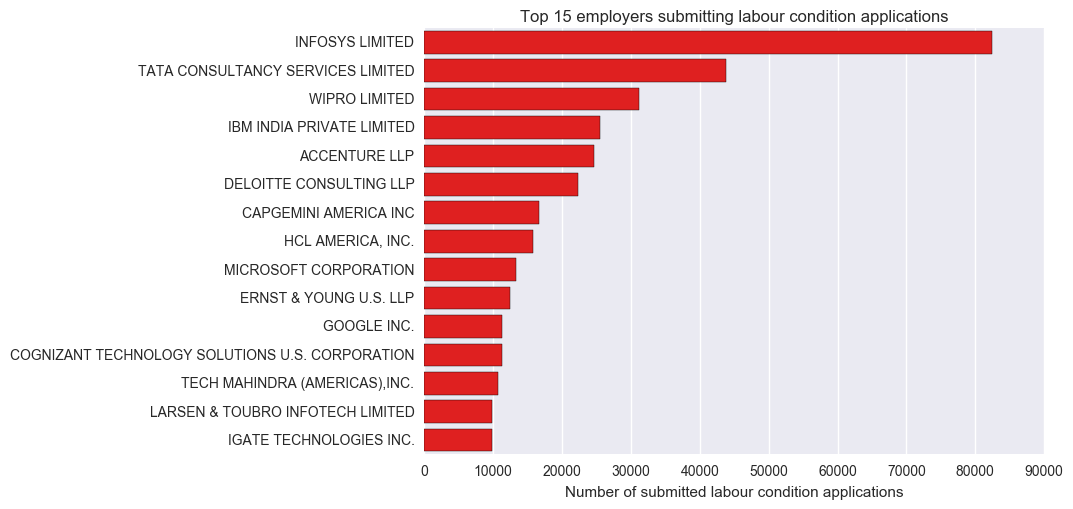

In [18]:
sns.plt.figure()
sns.barplot(total_values, total_index, color='r')
sns.plt.title('Top 15 employers submitting labour condition applications')
sns.plt.xlabel('Number of submitted labour condition applications')
sns.plt.show()

Barplot showing how the number of submitted labour condition applications change over time with the top 15 employers. Can see that it's not the best way to display this data as the colours mix which confuses the plot. Should also sort this by max value so it's more readable.

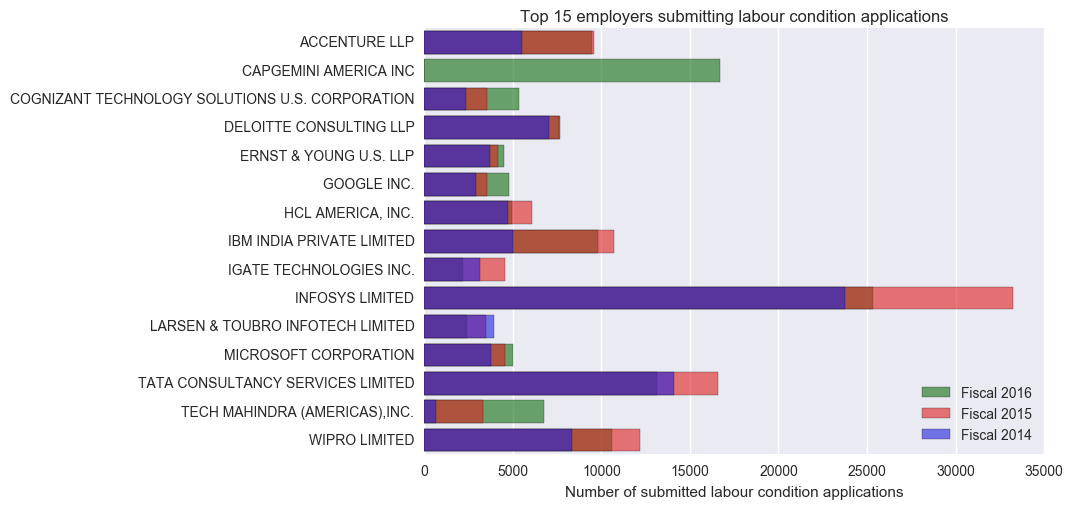

In [19]:
common_emp16 = df16.loc[df16['EMPLOYER_NAME'].isin(total_index)]['EMPLOYER_NAME'].value_counts()
common_emp15 = df15.loc[df15['EMPLOYER_NAME'].isin(total_index)]['EMPLOYER_NAME'].value_counts()
common_emp14 = df14.loc[df14['EMPLOYER_NAME'].isin(total_index)]['EMPLOYER_NAME'].value_counts()

common_emp15, common_emp16 = common_emp15.align(common_emp16, fill_value=0)
common_emp14 = common_emp14.align(common_emp16, fill_value=0)[0]

sns.plt.figure()
colors = ['g', 'r', 'b']
labels = ['Fiscal 2016', 'Fiscal 2015', 'Fiscal 2014']
for c, i in enumerate([common_emp16, common_emp15, common_emp14]):
    
    # TOP 15 EMPLOYERS
    x = i.index[0:15]
    y = i.values[0:15]
    sns.barplot(y, x, color=colors[c], alpha=0.6, label=labels[c])
    sns.plt.title('Top 15 employers submitting labour condition applications')
    sns.plt.xlabel('Number of submitted labour condition applications')

sns.plt.legend(loc='lower right')
sns.plt.show()

The 15 most popular states where the foreign workers intend to work for the whole dataframe (2014 to 2016). It can be seen that California is the most popular followed by Texas.

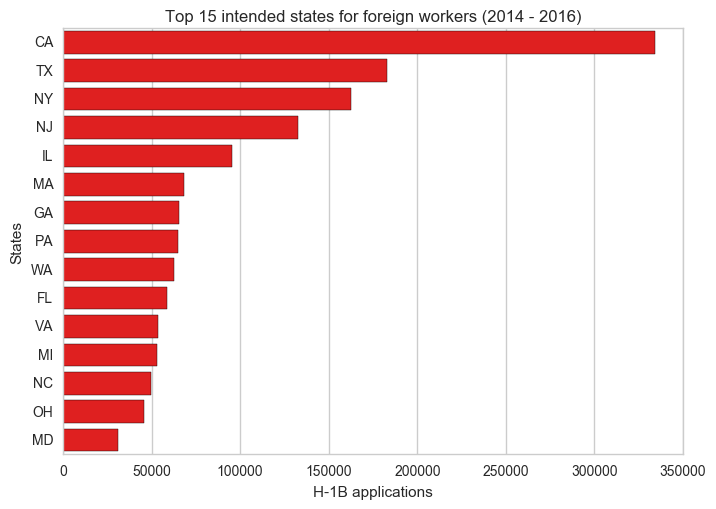

In [20]:
common_emp = df['WORKSITE_STATE'].value_counts()

# THE 15 MOST POPULAR STATES FOR THE WORKERS INTENDED EMPLOYEMNT LOCATION 
x = common_emp.index[0:15]
y = common_emp.values[0:15]

sns.plt.figure()
sns.set(style='whitegrid')
sns.barplot(y, x, color='r')
sns.plt.title('Top 15 intended states for foreign workers (2014 - 2016)')
sns.plt.xlabel('H-1B applications')
sns.plt.ylabel('States')
sns.plt.show()

Removing the inconsistent values from CASE_STATUS

In [21]:
status_list = ['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN']
df['CASE_STATUS'] = df['CASE_STATUS'].apply(lambda x: x if x in status_list else float('NaN'))

In [22]:
df['LOGGED_PREVAILING_WAGE'] = df['YEARLY_PREVAILING_WAGE'].apply(lambda x: np.log(x) if x != 0 else float('NaN'))
df['LOGGED_YEARLY_WAGE_RATE_OF_PAY_FROM'] = df['YEARLY_WAGE_RATE_OF_PAY_FROM'].apply(lambda x: np.log(x) if x != 0 else float('NaN'))

Removes all NaN values from the dataframe.

In [23]:
dfnona = df.dropna()

Violin plots for the logged yearly prevailing wages and offered wages against the case status, there are clearly some errors in the values here. Some are clearly too large to be sensible (Use a threshold value for each unit in unit conversion? not really sure what to set the thresholds as).

Seeing a large proportion of applications get rejected or withdrawn due to mistakes?

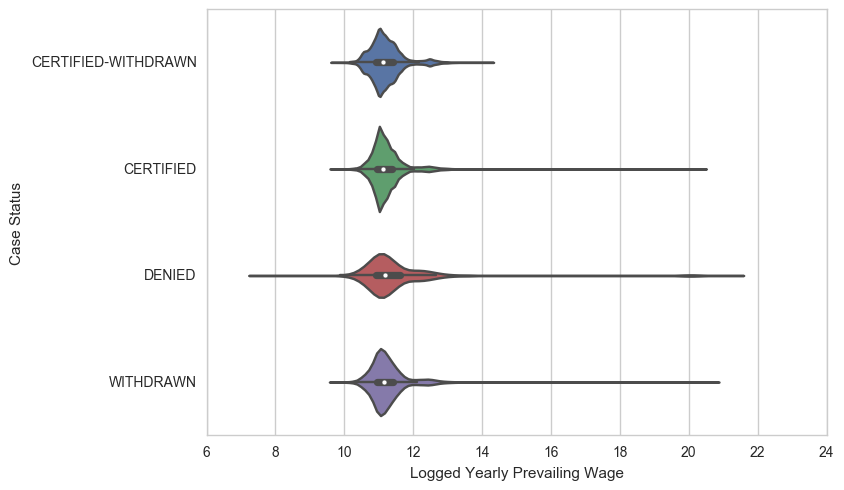

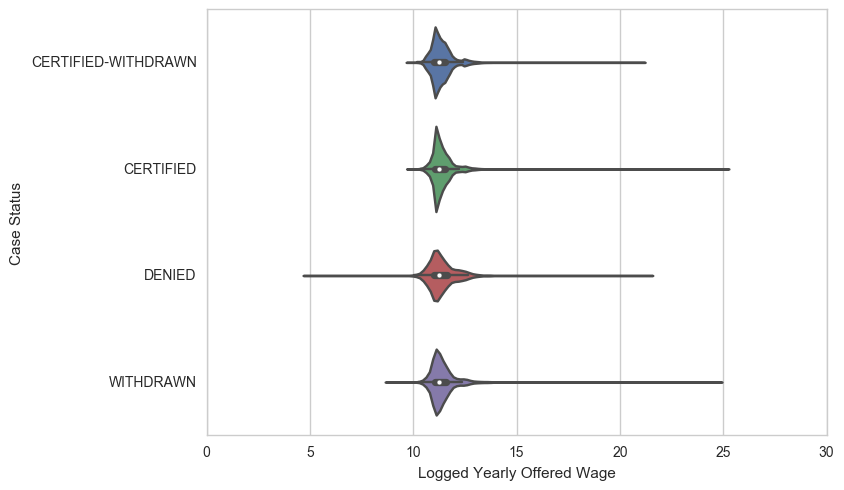

In [24]:
sns.plt.figure()
sns.violinplot(y='CASE_STATUS', x='LOGGED_PREVAILING_WAGE', data=dfnona)
sns.plt.ylabel('Case Status')
sns.plt.xlabel('Logged Yearly Prevailing Wage')

sns.plt.figure()
sns.violinplot(y='CASE_STATUS', x='LOGGED_YEARLY_WAGE_RATE_OF_PAY_FROM', data=dfnona)
sns.plt.ylabel('Case Status')
sns.plt.xlabel('Logged Yearly Offered Wage')

sns.plt.show()

Attempting to add a threshold cutoff for both wage types (made the upper yearly threshold 10e6).

In [25]:
def threshold(x):
    if x > 50e6:
        return float('NaN')
    else:
        return x

In [26]:
# Prevailing wage
df['THRESH_Y_PW'] = df['YEARLY_PREVAILING_WAGE'].apply(threshold)
# Offered wage
df['THRESH_Y_OW'] = df['YEARLY_WAGE_RATE_OF_PAY_FROM'].apply(threshold)

df['LOGGED_THRESH_PREVAILING_WAGE'] = df['THRESH_Y_PW'].apply(
    lambda x: np.log(x) if x != 0 else float('NaN'))
df['LOGGED_THRESH_YEARLY_WAGE_RATE_OF_PAY_FROM'] = df['THRESH_Y_OW'].apply(
    lambda x: np.log(x) if x != 0 else float('NaN'))

dfnona = df.dropna()

Violin plots (same as above) with the added threshold (needs refinement and the threshold is probably too simplistic).

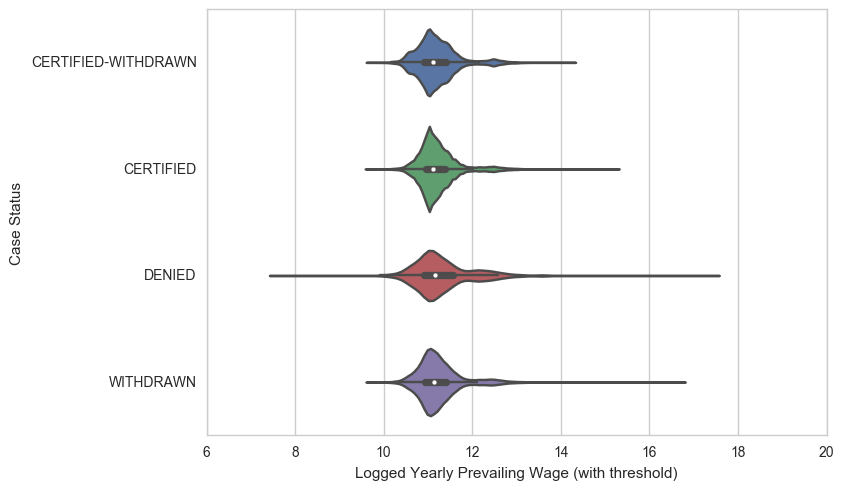

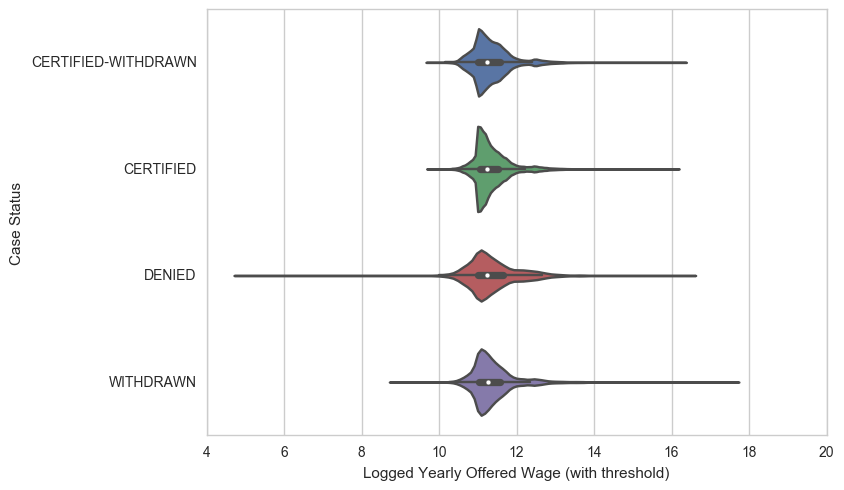

In [27]:
sns.plt.figure()
sns.violinplot(y='CASE_STATUS', x='LOGGED_THRESH_PREVAILING_WAGE', data=dfnona)
sns.plt.ylabel('Case Status')
sns.plt.xlabel('Logged Yearly Prevailing Wage (with threshold)')

sns.plt.figure()
sns.violinplot(y='CASE_STATUS', x='LOGGED_THRESH_YEARLY_WAGE_RATE_OF_PAY_FROM', data=dfnona)
sns.plt.ylabel('Case Status')
sns.plt.xlabel('Logged Yearly Offered Wage (with threshold)')

sns.plt.show()

A plot for the number of H-1B application decisions made throughout the 3 fiscal years. Can see that more decisions are made around februrary/march time each year.

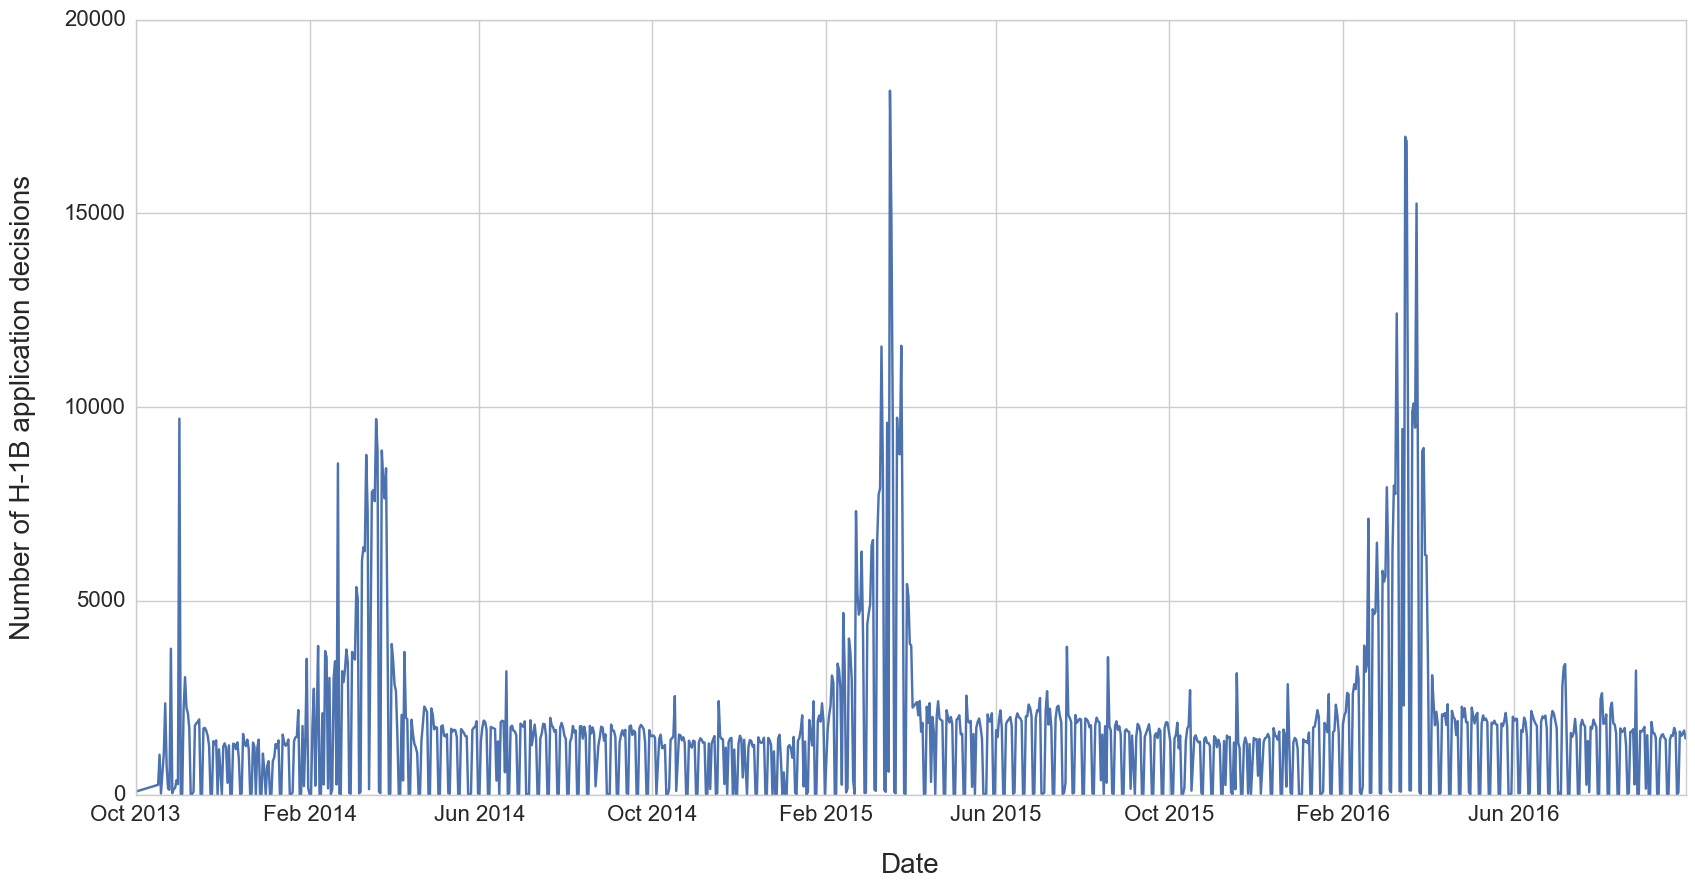

In [28]:
dates_series = df['DECISION_DATE']
ind = dates_series.value_counts().index.tolist()
h1values = dates_series.value_counts().values

zipped = zip(ind,h1values)
zipped.sort(key=lambda pair: pair[0])

dates_data = zip(*zipped)

sns.plt.figure(figsize=(20,10))
sns.plt.plot(list(dates_data[0]), list(dates_data[1]))
sns.plt.ylabel('Number of H-1B application decisions', fontsize=20, labelpad=20)
sns.plt.xlabel('Date', fontsize=20, labelpad=20)
sns.plt.tick_params(axis='both', which='major', labelsize=16)
sns.plt.show()